2508.7546716818033
(array([7338, 7341], dtype=int64),)
7339


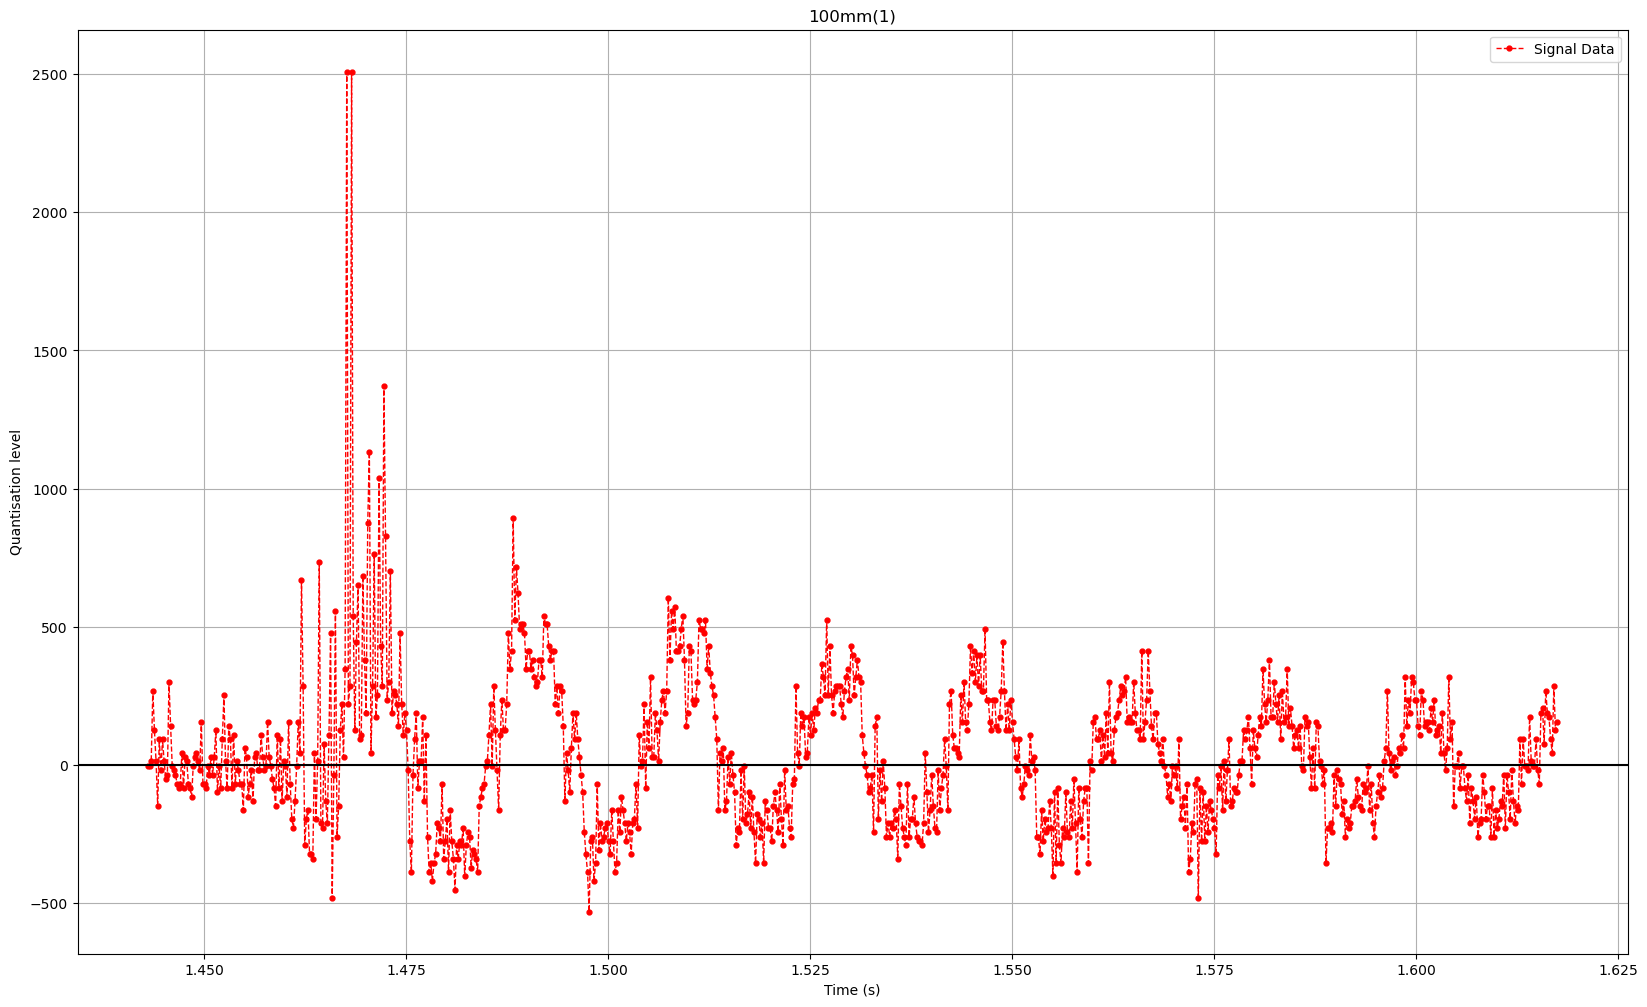

605.2927902696683
(array([2971], dtype=int64),)
2971


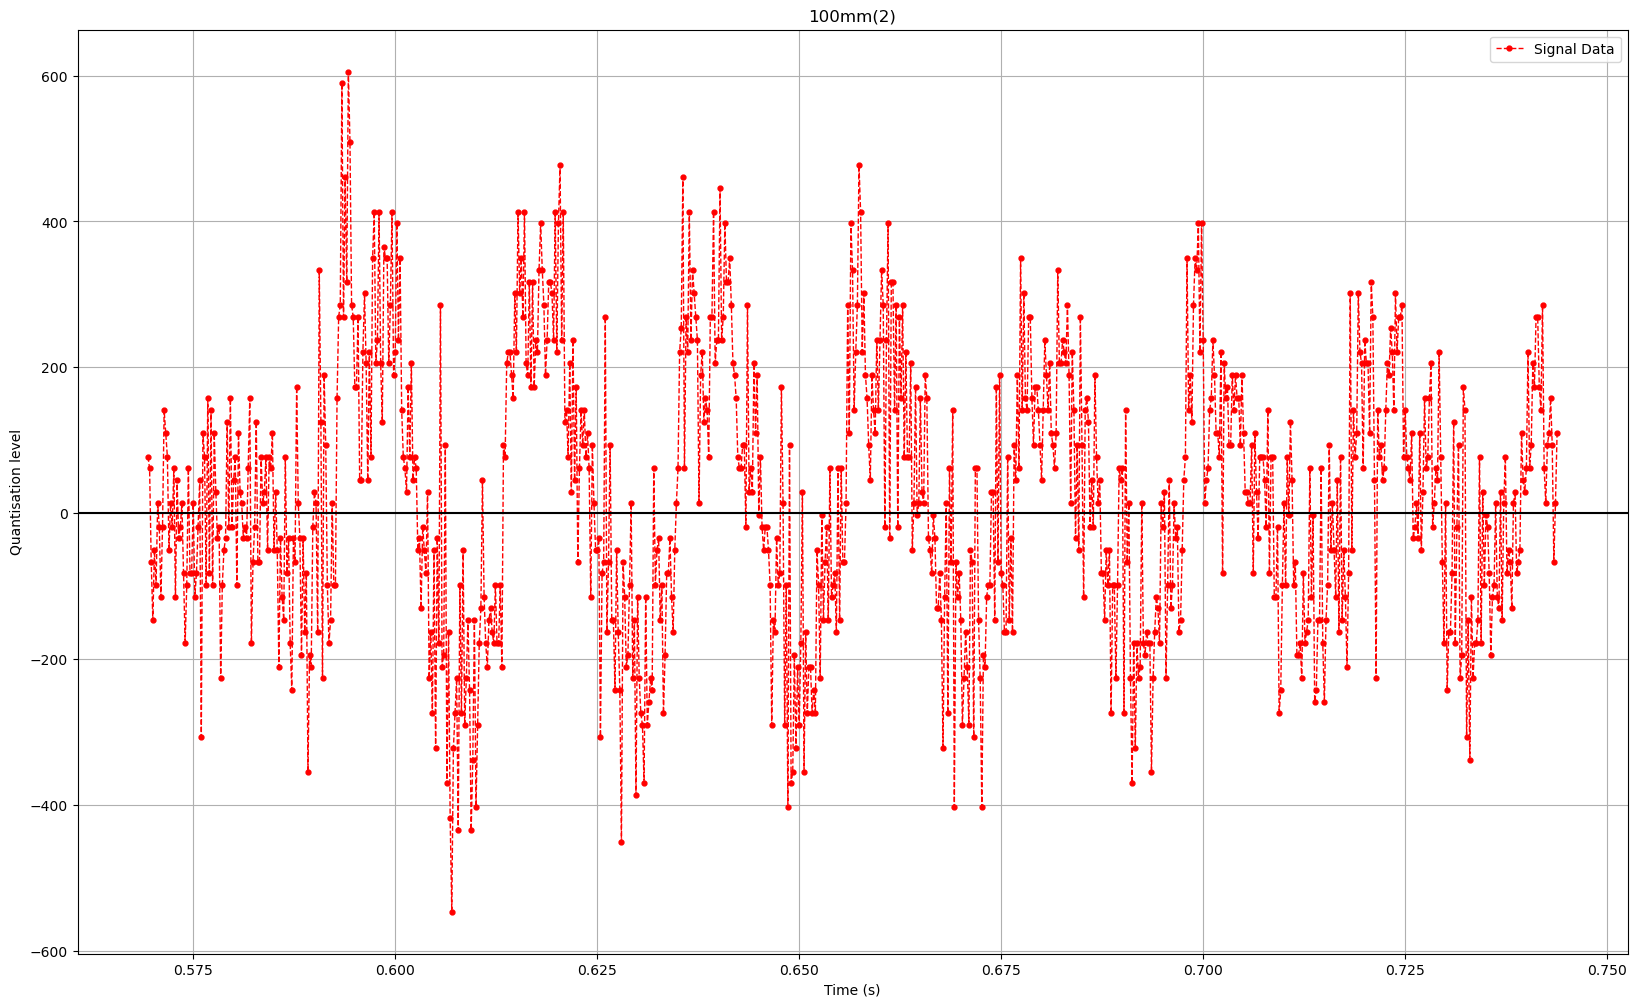

441.95182843882503
(array([8849], dtype=int64),)
8849


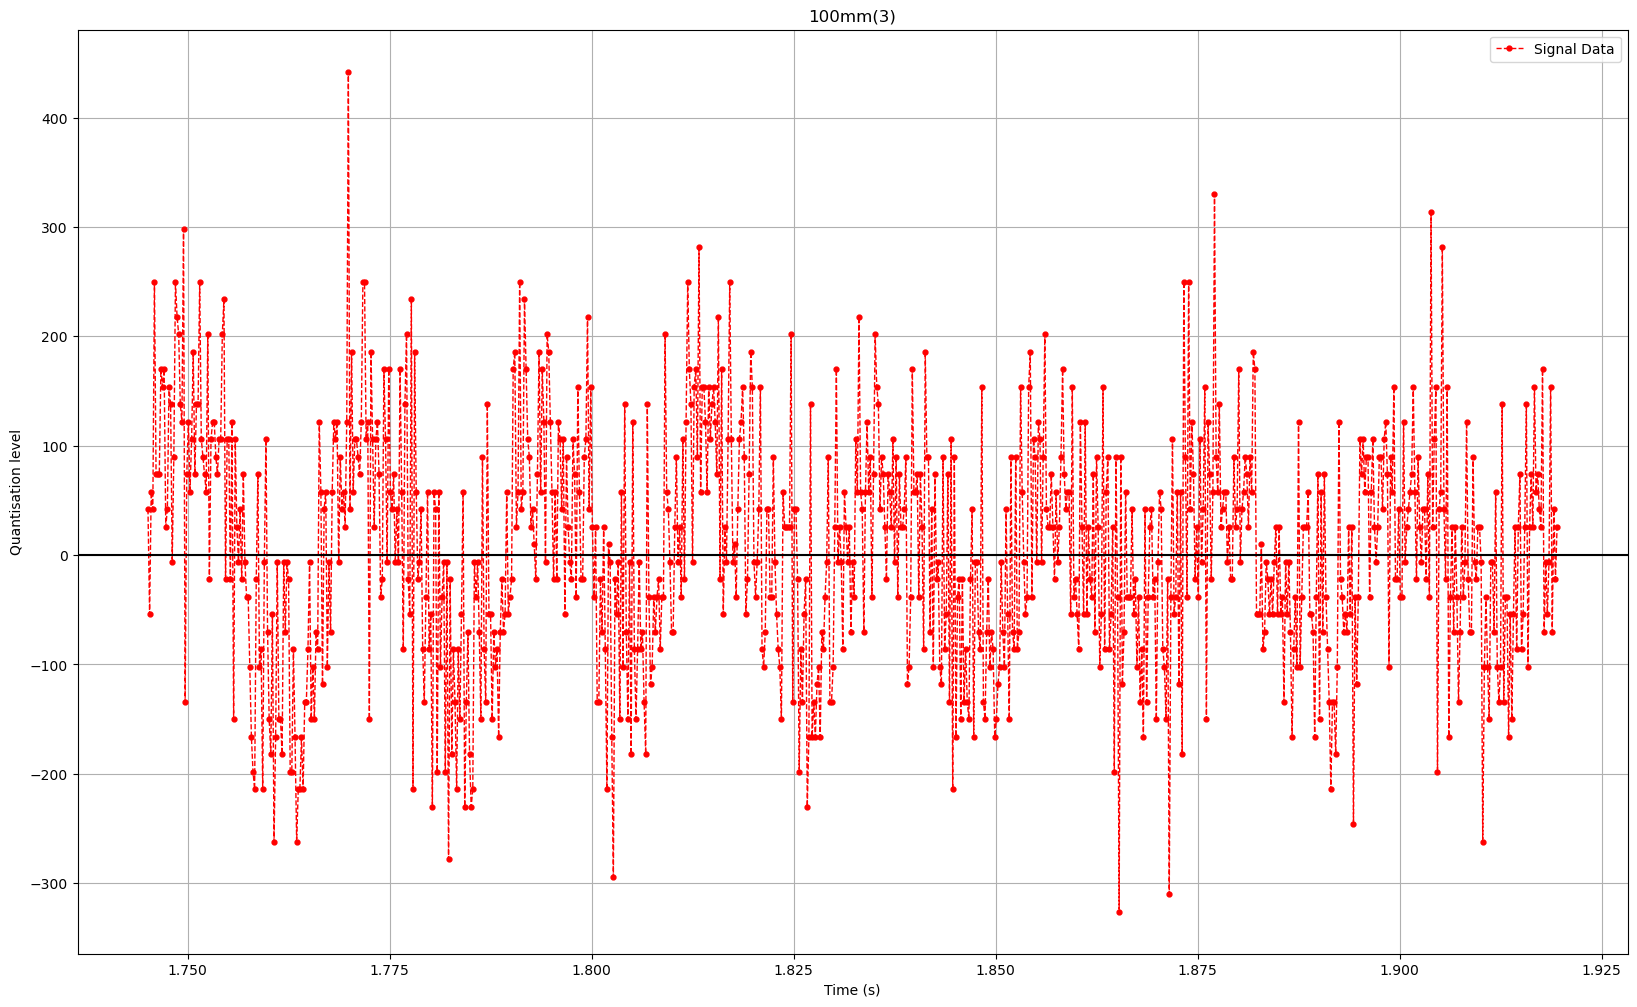

(array([  0,   1,  15,  28,  37,  44,  73,  76,  85,  92, 209, 213, 305,
       369, 403, 444, 494, 543, 629, 634, 636, 664, 714, 726, 755, 773,
       809, 810, 813, 814, 852, 853, 857, 858], dtype=int64),)
[array([1.44305774, 1.44325775, 1.44605786, 1.44865797, 1.45045804,
       1.4518581 , 1.45765833, 1.45825835, 1.46005842, 1.46145848,
       1.48485942, 1.48565945, 1.50406018, 1.5168607 , 1.52366097,
       1.5318613 , 1.5418617 , 1.55166209, 1.56886278, 1.56986282,
       1.57026283, 1.57586306, 1.58586346, 1.58826355, 1.59406379,
       1.59766393, 1.60486422, 1.60506423, 1.60566425, 1.60586426,
       1.61346456, 1.61366457, 1.6144646 , 1.61466461])]
f_frequency = 90.90909090909174 Hz
E_Youngs_Modulus = 210828132906.0589 Pa


In [215]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the .csv files
adc_data_100mm_1 = pd.read_csv('100mm(1).csv', header=None, names=['ADC_Value'])
adc_data_100mm_2 = pd.read_csv('100mm(2).csv', header=None, names=['ADC_Value'])
adc_data_100mm_3 = pd.read_csv('100mm(3).csv', header=None, names=['ADC_Value'])

# add same lines for 110, 120, 130, 140 etc


# define variables
sample_rate = 5000 # Sampling rate in Hz


#define functions
def remove_dc(csv_filename):

    df1 =  pd.read_csv(str(csv_filename), header=None, names=['ADC_Value'])

    num_samples = len(df1) # Number of samples in the data
    duration = num_samples / sample_rate # Total duration of the signal
    time = np.linspace(0, duration, num_samples) # Time axis
    # Extract ADC values from the data
    adc_values = df1['ADC_Value'].values

    # Remove DC component by subtracting the mean
    dc_component = np.mean(adc_values)
    signal_remove_dc = adc_values - dc_component

    max_signal = np.max(signal_remove_dc)
    print(max_signal)

    max_index = np.where(signal_remove_dc == np.mean(max_signal))
    print(max_index)

    mean_max = np.mean(max_index)
    print(int(mean_max))
    
    lower_index = int(mean_max - int(num_samples * 0.005))
    upper_index = int(mean_max + int(num_samples * 0.03))

    timebase = time[lower_index:upper_index]
    signal_cropped = signal_remove_dc[lower_index:upper_index]

    plt.figure(figsize=(20, 12)) # Set figure size
    plt.title(str(csv_filename)[0:8]) # Give a title
    plt.plot(timebase, signal_cropped, color='red', linestyle='--', linewidth=1.0, marker='.', markersize=7, label='Signal Data') # Set the line plot
    plt.axhline(y=0, color='black', linestyle='-') # Set a line at y=0

    # Set the lable
    plt.xlabel('Time (s)')
    plt.ylabel('Quantisation level')

    plt.legend() # Show legend
    plt.grid() # Add grid

    # Display
    plt.savefig(str(csv_filename)[0:8] + '.png', dpi = 400)
    plt.show()

    
    #return timebase
    return timebase, signal_cropped
    
# call function for each dataset 
time_100mm_1, signal_100mm_1 = remove_dc('100mm(1).csv')
time_100mm_2, signal_100mm_2 = remove_dc('100mm(2).csv')
time_100mm_3, signal_100mm_3 = remove_dc('100mm(3).csv')

#Need to finish:

x_intercepts = np.where(abs(signal_cropped) < 10)
print(x_intercepts)

zero_times = []

for i in x_intercepts:
    zero_times.append(timebase[i])

print(zero_times)

# Calculate the Young's Modulus
T_period = 1.545 - 1.534 # Period in s
f_frequency = 1/T_period # frequency in Hz
L_overhang_length = 0.1 # Overhang lengh in m
q_mass_per_unit_length = 0.2 # mass per unit length in Kg/m
I_second_moment_of_area = 2.5e-12 # second moment of area in m ** 4
E_Youngs_Modulus = (f_frequency ** 2 * q_mass_per_unit_length * L_overhang_length ** 4)/(0.56**2 * I_second_moment_of_area) # Young's Modulus in Pa
print('f_frequency', '=', f_frequency, 'Hz')
print('E_Youngs_Modulus', '=', E_Youngs_Modulus, 'Pa')



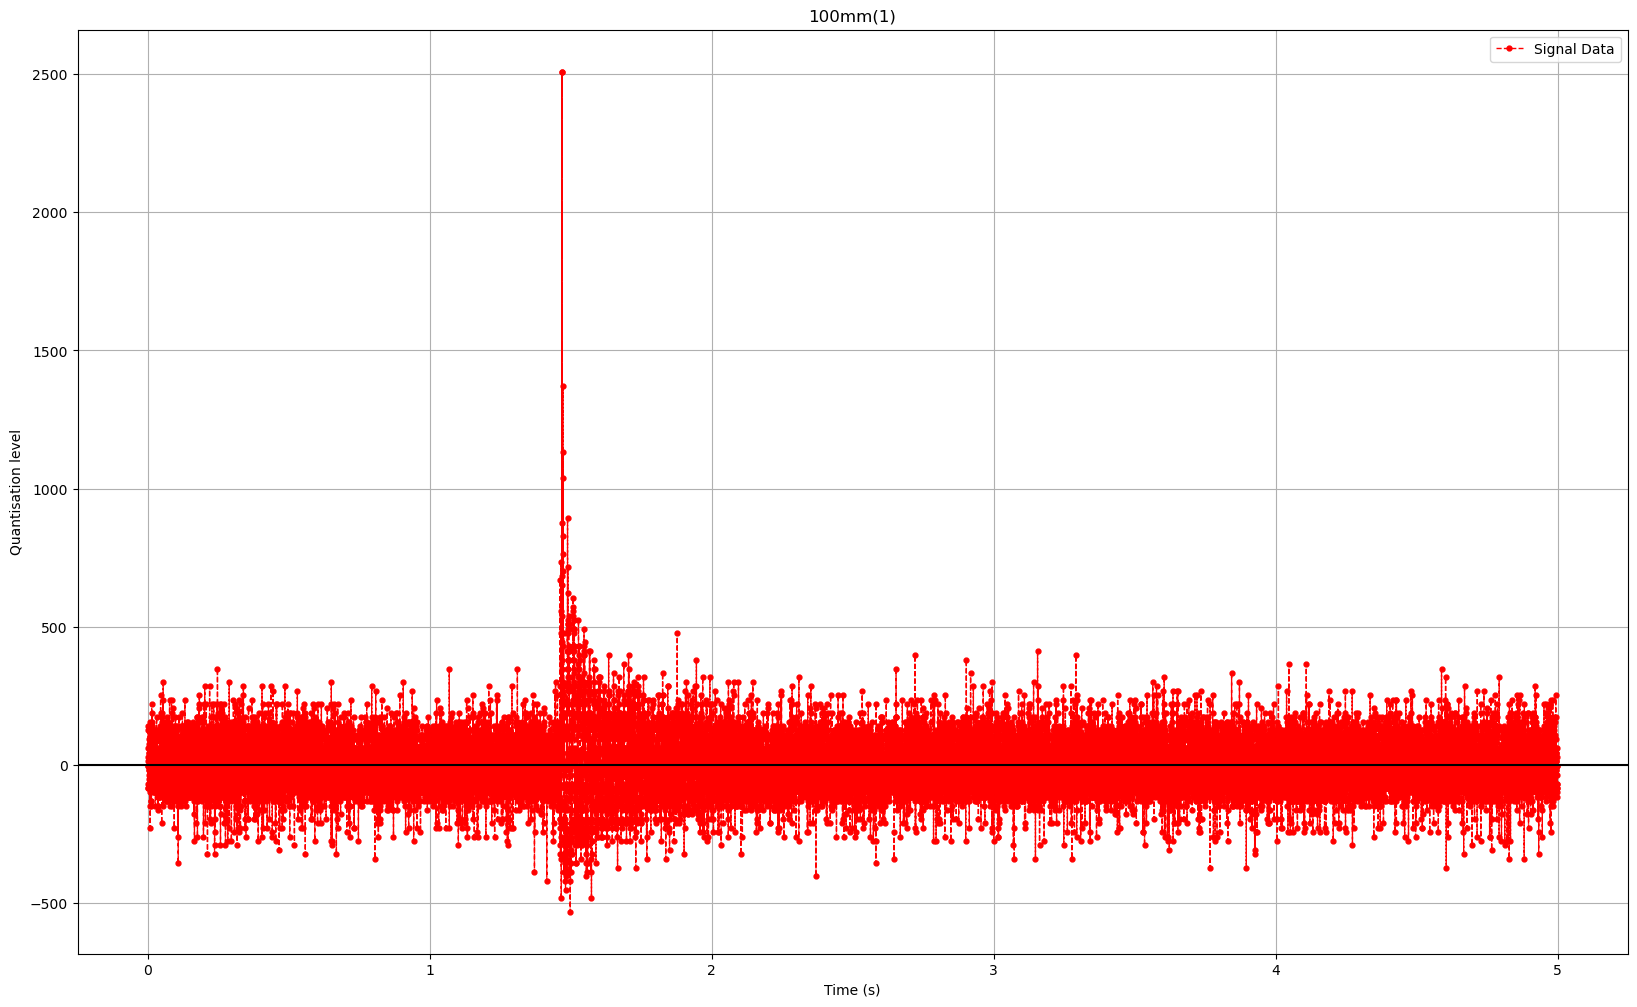

f_frequency = 90.90909090909174 Hz
E_Youngs_Modulus = 210828132906.0589 Pa


In [76]:
# Calculate the Young's Modulus
T_period = 1.545 - 1.534 # Period in s
f_frequency = 1/T_period # frequency in Hz
L_overhang_length = 0.1 # Overhang lengh in m
q_mass_per_unit_length = 0.2 # mass per unit length in Kg/m
I_second_moment_of_area = 2.5e-12 # second moment of area in m ** 4
E_Youngs_Modulus = (f_frequency ** 2 * q_mass_per_unit_length * L_overhang_length ** 4)/(0.56**2 * I_second_moment_of_area) # Young's Modulus in Pa
print('f_frequency', '=', f_frequency, 'Hz')
print('E_Youngs_Modulus', '=', E_Youngs_Modulus, 'Pa')